In [86]:
using Random 
using Clustering
using Plots

In [110]:
Random.seed!(2)
X = randn(Float16, (2,50))
X[1, :25] = X[1, :25] + 3
X[2, :25] = X[2, :25] - 4


Float16(-2.83)

In [88]:
seed = initseeds(:kmpp, X, 20)
km1 = kmeans(X, 2) 

KmeansResult{Matrix{Float16}, Float16, Int64}(Float16[0.9194 -0.6167; -0.2554 0.641], [2, 2, 2, 2, 1, 2, 1, 1, 1, 2  …  1, 1, 1, 2, 1, 1, 1, 1, 1, 2], Float16[1.57, 0.1934, 0.1953, 1.572, 1.384, 3.533, 0.4844, 0.0293, 2.88, 2.605  …  0.615, 0.6133, 0.7793, 0.3877, 2.912, 2.164, 0.702, 0.1641, 1.814, 0.9053], [28, 22], [28, 22], Float16(73.1), 4, true)

In [89]:
print("Labels are: \n \n")
print(assignments(km1))

Labels are: 
 
[2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2]

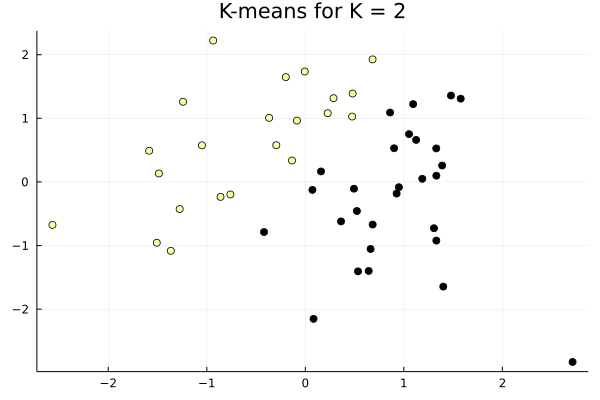

In [90]:
scatter(X[1, :], X[2, :], title="K-means for K = 2", marker_z=km1.assignments, legend = false)

In [91]:
Random.seed!(4)
seed = initseeds(:kmpp, X, 20)
km2 = kmeans(X, 3) 

KmeansResult{Matrix{Float16}, Float16, Int64}(Float16[0.7407 0.931 -1.057; 0.7754 -1.263 0.1493], [1, 3, 3, 3, 2, 3, 1, 1, 1, 3  …  1, 2, 1, 1, 1, 2, 2, 1, 1, 1], Float16[1.48, 0.1816, 1.21, 0.379, 0.10156, 1.615, 0.6875, 0.7803, 0.9844, 4.312  …  0.0879, 0.2734, 0.4082, 0.717, 0.883, 0.3633, 0.1133, 0.7285, 0.11523, 0.3574], [24, 11, 15], [24, 11, 15], Float16(44.3), 5, true)

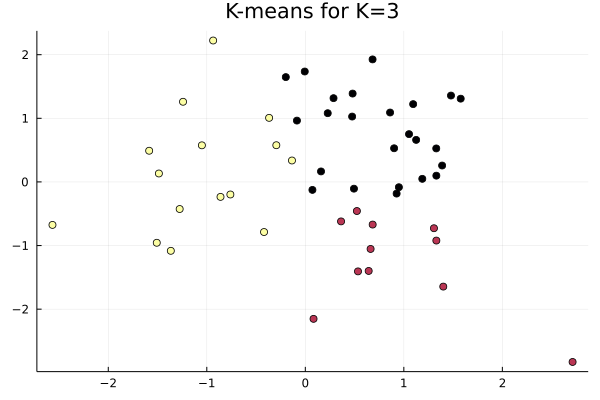

In [92]:
scatter(X[1, :], X[2, :], title= "K-means for K=3", marker_z=km2.assignments, legend = false)

In [93]:
print("Size of each cluster: \n")
km2.counts

Size of each cluster: 


3-element Vector{Int64}:
 24
 11
 15

In [95]:
print("Centers of the clusters: \n")
for i in 1:3 
    print("( ", km2.centers'[i,1], ", ", km2.centers'[i,2], ") \n")
end

Centers of the clusters: 
( 0.7407, 0.7754) 
( 0.931, -1.263) 
( -1.057, 0.1493) 


In [96]:
print("Labels are: \n \n")
print(km2.assignments)

Labels are: 
 
[1, 3, 3, 3, 2, 3, 1, 1, 1, 3, 3, 3, 3, 2, 1, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 1, 1, 3, 1, 2, 2, 2, 3, 3, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1]

In [119]:
# No native function in Julia for sum of squares 
# we build a custom function that returns all kinds of sum of squares
function SS(km, X)
    num_clust = size(km.counts)[1]
    num_data = size(km.assignments)[1]
    ss = zeros((num_clust, num_clust))
    for cluster in 1:num_clust 
        for other_cluster in 1:num_clust
            x_center = km.centers[1, other_cluster]
            y_center = km.centers[2, other_cluster]
            for element in 1:num_data
                x = X[1, element]
                y = X[2, element] 
                label = km.assignments[element] 
                if(label == cluster)
                    ss[cluster, other_cluster]+= (x-x_center)^2 + (y-y_center)^2
                end
            end
        end
    end
    return ss
end

SS (generic function with 2 methods)

In [123]:
ss = SS(km2, X) 
# "within_ss" in R corresponds to diagonal elements of ss"
print("Within_SS: \n")
for i in 1:3 
    print(ss[i,i], "\n") 
end
print("------------------------\n")

# "between_ss" in R corresponds to sum of off-diagonal elements of ss"
print("Between_SS: \n")
bss=0
for i in 1:3 
    for j in 1:3
        if(i!=j)
            bss+=ss[i,j]
        end
    end
end
print(bss, "\n")
print("------------------------\n")

# "tot.within_ss" in R corresponds sum of diagonal elements os ss"
print("Tot.within_SS: \n")
twss=0
for i in 1:3 
    twss+=ss[i,i]
end
print(twss, "\n")
print("------------------------\n")

# "total_ss" in R corresponds sum of all elements os ss"
print("Total_SS: \n")
tss=twss+bss
print(tss, "\n")
print("------------------------\n")

print("Between_SS/Total_SS: \n")
print(bss/tss*100, " % \n")




Within_SS: 
16.4215087890625
10.5643310546875
17.2607421875
------------------------
Between_SS: 
530.970703125
------------------------
Tot.within_SS: 
44.24658203125
------------------------
Total_SS: 
575.21728515625
------------------------
Between_SS/Total_SS: 
92.30784902104759 % 


In [124]:
Random.seed!(3) 
seed = initseeds(:kmpp, X, 1)
km3a = kmeans(X, 3) 
seed = initseeds(:kmpp, X, 20)
km3b = kmeans(X, 3) 

KmeansResult{Matrix{Float16}, Float16, Int64}(Float16[-0.9863 0.931 0.7705; 0.1321 -1.263 0.8145], [3, 1, 1, 1, 2, 1, 3, 3, 3, 1  …  3, 2, 3, 3, 3, 2, 2, 3, 3, 3], Float16[1.453, 0.2012, 1.148, 0.3965, 0.10156, 1.621, 0.6934, 0.838, 0.8984, 4.37  …  0.0996, 0.2734, 0.3945, 0.756, 0.793, 0.3633, 0.1133, 0.7607, 0.08594, 0.3672], [16, 11, 23], [16, 11, 23], Float16(44.25), 6, true)

In [125]:
ssa = SS(km3a, X) 
ssb = SS(km3b, X) 
twssa = 0
twssb = 0
for i in 1:3
    twssa+=ssa[i,i]
    twssb+=ssb[i,i]
end
print("Total_within_SS for n_init = 1: ", twssa, "\n")
print("Total_within_SS for n_init = 20: ", twssb, "\n")

Total_within_SS for n_init = 1: 57.17201232910156
Total_within_SS for n_init = 20: 44.1976318359375
